# BERTopic


In [1]:
import numpy as np
import pandas as pd
from bertopic import BERTopic

/Users/christophersantiago/miniforge3/envs/bookmarks/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data

In [8]:
bookmark_file = 'bookmarks_df.p'
data = pd.read_pickle(bookmark_file).drop_duplicates().dropna().reset_index(drop=True)
titles = data['title']
contents = data['url_text']
text = titles + contents

In [6]:
data.head()

,title,url,url_text
0,Dashboard | edX,https://courses.edx.org/dashboard,\n Sign in or Register | edX\n
1,GT | GT Login,https://login.gatech.edu/cas/login,GT | GT Login I don't know my GT Account I don...
2,BuzzPort Login,https://buzzport.gatech.edu/cp/home/displaylogin,BuzzPort | Georgia Tech Creating the next Buzz...
3,Georgia Tech :: Account Management :: Passport,https://passport.gatech.edu/home,Georgia Tech :: Account Management :: Passport...
4,Georgia Tech OMS Analytics - Google+,https://plus.google.com/communities/1006647335...,Sign in - Google Accounts \n\n\n Sign in with...


In [7]:
data.shape

(922, 3)

In [9]:
text[:5]

0    Dashboard | edX\n       Sign in or Register | ...
1    GT | GT LoginGT | GT Login I don't know my GT ...
2    BuzzPort LoginBuzzPort | Georgia Tech Creating...
3    Georgia Tech :: Account Management :: Passport...
4    Georgia Tech OMS Analytics - Google+Sign in - ...
dtype: object

# Fit Model

In [15]:
model = BERTopic(
    top_n_words=5,
    n_gram_range=(1,3),
    nr_topics='auto'
)
topics, probs = model.fit_transform(titles)

In [16]:
model.get_topic_info()

,Topic,Count,Name
0,-1,199,-1_data_in_documentation_to
1,0,245,0_python_documentation_with_scikitlearn
2,1,59,1_docker_hadoop_aws_mapreduce
3,2,43,2_time_series_time series_forecasting
4,3,35,3_git_github_to_markdown
5,4,34,4_airflow_apache airflow_apache_with apache ai...
6,5,30,5_online_university_science_johns
7,6,29,6_sphinx_restructuredtext_topic_python
8,7,26,7_jupyter_aws_notebooks_notebook
9,8,25,8_cran package_cran_package_package portfolioa...


In [17]:
model.get_document_info(titles)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,Dashboard | edX,0,0_python_documentation_with_scikitlearn,python - documentation - with - scikitlearn - in,0.313488,False
1,GT | GT Login,-1,-1_data_in_documentation_to,data - in - documentation - to - regression,0.000000,False
2,BuzzPort Login,-1,-1_data_in_documentation_to,data - in - documentation - to - regression,0.000000,False
3,Georgia Tech :: Account Management :: Passport,-1,-1_data_in_documentation_to,data - in - documentation - to - regression,0.000000,False
4,Georgia Tech OMS Analytics - Google+,-1,-1_data_in_documentation_to,data - in - documentation - to - regression,0.000000,False
...,...,...,...,...,...,...
917,.gitignore file - ignoring files in Git | Atla...,3,3_git_github_to_markdown,git - github - to - markdown - repository,1.000000,True
918,linux - Add previously ignored directory to Gi...,3,3_git_github_to_markdown,git - github - to - markdown - repository,1.000000,False
919,How to update your Git credentials on Windows,3,3_git_github_to_markdown,git - github - to - markdown - repository,1.000000,False
920,Getting started with Git and GitHub: the compl...,3,3_git_github_to_markdown,git - github - to - markdown - repository,0.642783,False


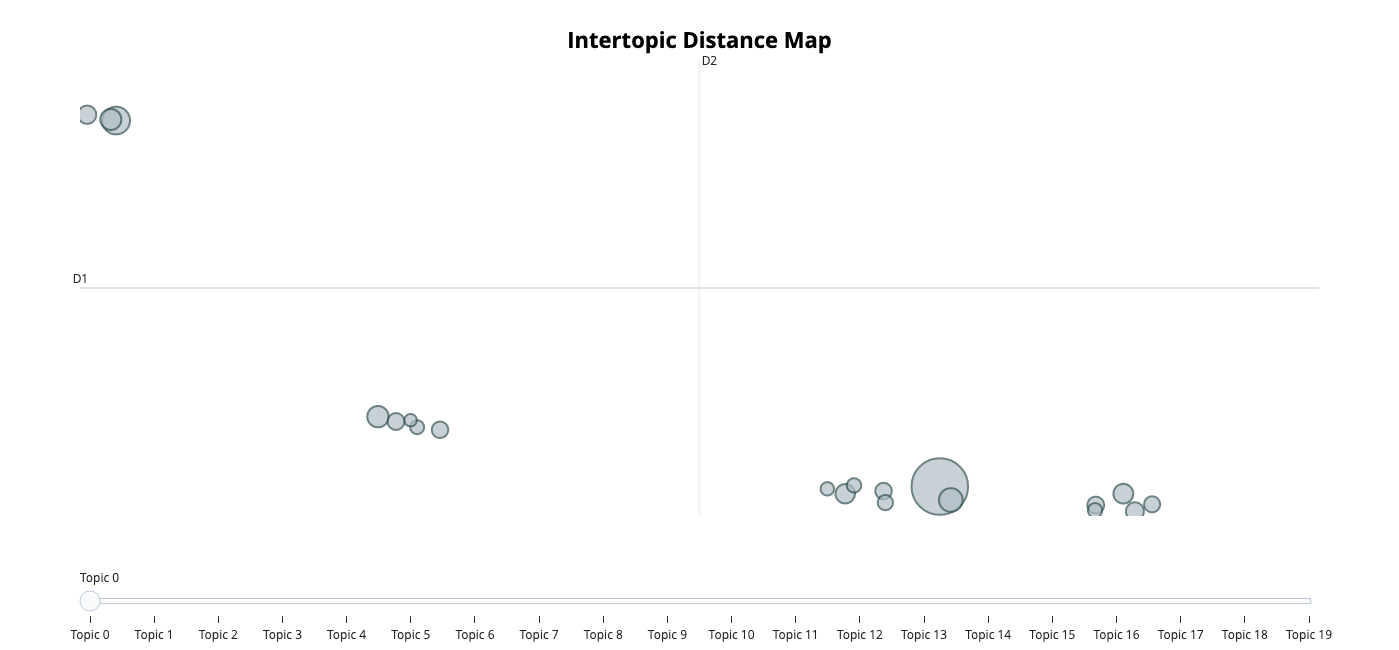

In [18]:
model.visualize_topics()

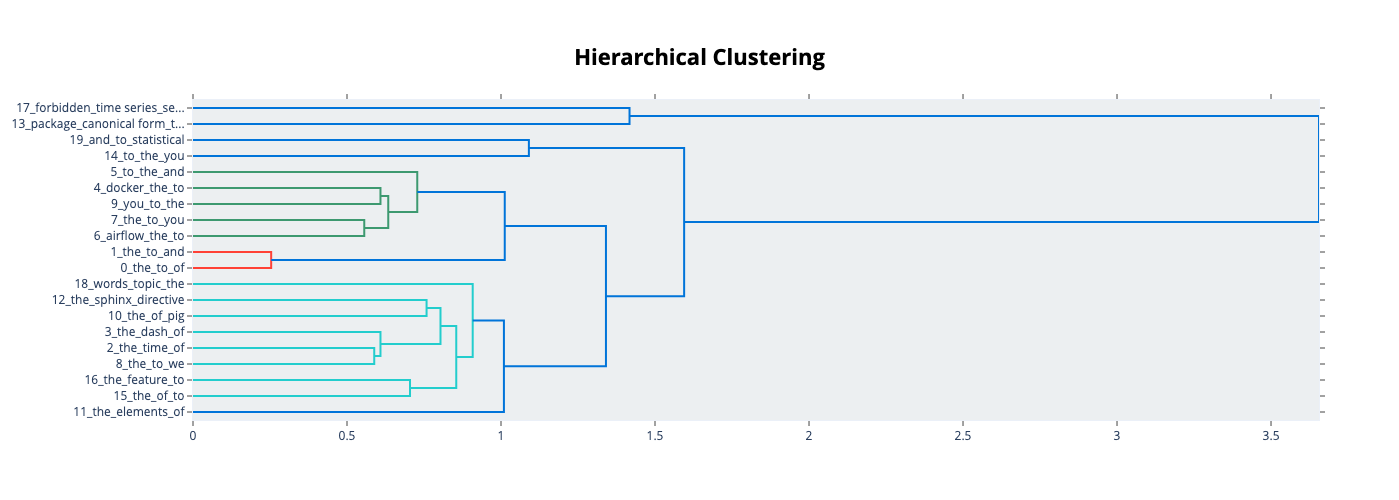

In [14]:
model.visualize_hierarchy()

In [19]:
model.get_representative_docs()

{0: ['Dash Documentation & User Guide | Plotly',
  'Dash-by-Plotly/intro.py at master · Coding-with-Adam/Dash-by-Plotly',
  'Dash User Guide and Documentation - Dash by Plotly',
  'Look Ma, No For-Loops: Array Programming With NumPy – Real Python',
  'Numpy and Scipy Documentation — Numpy and Scipy documentation',
  'numpy.cumsum — NumPy v1.15 Manual',
  'Python Design Patterns',
  'Modules and Packages - Learn Python - Free Interactive Python Tutorial',
  'Automate the Boring Stuff with Python',
  '3.2.4.3.5. sklearn.ensemble.GradientBoostingClassifier — scikit-learn 0.20.3 documentation',
  'Introducing the ColumnTransformer: applying different transformations to different features in a scikit-learn pipeline | Joris Van den Bossche',
  'scikit-learn: machine learning in Python — scikit-learn 0.20.0 documentation',
  "Let's be Faster and more Parallel in R with doParallel package | R-bloggers",
  'R: Make Syntactically Valid Names',
  'Parallelize Machine Learning in R with Multi-Core

In [21]:
model.get_topic(16)

[('julia', 0.1897432989737229),
 ('for data science', 0.06900910030354684),
 ('for data', 0.06688420305206587),
 ('data science', 0.05399611819348715),
 ('science', 0.053187732919934935)]

In [22]:
model.get_topic(4)

[('airflow', 0.1326080845259693),
 ('apache airflow', 0.07074782663252197),
 ('apache', 0.06645856803456558),
 ('with apache airflow', 0.03392501553510931),
 ('with apache', 0.03392501553510931)]

In [23]:
model.hierarchical_topics(titles)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 135.72it/s]


,Parent_ID,Parent_Name,Topics,Child_Left_ID,Child_Left_Name,Child_Right_ID,Child_Right_Name,Distance
18,38,python_documentation_to_and_with,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",29,package_cran package_cran_documentation_functi...,37,python_to_and_with_documentation,1.097644
17,37,python_to_and_with_documentation,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16...",35,python_to_documentation_with_in,36,for_jupyter_deep_learning_data,1.076166
16,36,for_jupyter_deep_learning_data,"[5, 7, 9, 12, 13, 15, 16, 19]",33,jupyter_deep_deep learning_learning_for,34,d3_lasso_javascript_math_ridge,1.034365
15,35,python_to_documentation_with_in,"[0, 1, 2, 3, 4, 6, 10, 17, 18]",28,mysql_github_git_on_to,31,python_with_documentation_in_to,1.016881
14,34,d3_lasso_javascript_math_ridge,"[9, 12, 13, 19]",32,d3_lasso_javascript_ridge_math,9,jhu_prefect_beta_rodeo_schafer prefect,1.007430
13,33,jupyter_deep_deep learning_learning_for,"[5, 7, 15, 16]",22,jupyter_deep learning_deep_learning_aws,26,julia_science_data science_data_for,1.006014
12,32,d3_lasso_javascript_ridge_math,"[12, 13, 19]",19,lasso_ridge_elastic net_elastic_net,30,d3_javascript_math_d3js_javascript mdn,0.992236
11,31,python_with_documentation_in_to,"[0, 1, 2, 4, 6, 18]",27,python_with_documentation_to_in,21,time_time series_series_xgboost_forecasting,0.982725
10,30,d3_javascript_math_d3js_javascript mdn,"[12, 13]",12,d3_d3js_blocksorg_in_d3 stack overflow,13,math_javascript_problem solver_problem_javascr...,0.977653
9,29,package_cran package_cran_documentation_functi...,"[8, 11, 14]",23,package_cran package_cran_function documentati...,11,documentation_documentation welcome_documentat...,0.974844


In [24]:
model.topic_labels_

{-1: '-1_data_in_documentation_to',
 0: '0_python_documentation_with_scikitlearn',
 1: '1_docker_hadoop_aws_mapreduce',
 2: '2_time_series_time series_forecasting',
 3: '3_git_github_to_markdown',
 4: '4_airflow_apache airflow_apache_with apache airflow',
 5: '5_online_university_science_johns',
 6: '6_sphinx_restructuredtext_topic_python',
 7: '7_jupyter_aws_notebooks_notebook',
 8: '8_cran package_cran_package_package portfolioanalytics',
 9: '9_jhu_prefect_beta_rodeo',
 10: '10_mysql_sqlalchemy_os_installing',
 11: '11_documentation_documentation welcome_documentation welcome to_boto',
 12: '12_d3_d3js_blocksorg_in',
 13: '13_math_javascript_problem solver_problem',
 14: '14_function documentation_function_package documentation_documentation',
 15: '15_deep learning_deep_learning_tensorflow',
 16: '16_julia_for data science_for data_data science',
 17: '17_conda_anaconda_install_windows',
 18: '18_xgboost_081_with xgboost_081 documentation',
 19: '19_lasso_ridge_elastic net_elastic'